# LGMVIP Task-1 Iris Flowers Classification ML Project

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv("iris.data", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
header_list = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
df.to_csv("Iris.csv", header=header_list, index=False)
df1 = pd.read_csv("Iris.csv")
df1.head()# for top 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EDA (Exploratory Data Analysis)

In [4]:
df1.shape #Number of columns and rows in dataset

(150, 5)

In [5]:
df1.columns #column headings

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df1.info()  #datatypes and missing/null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df1.describe() #summary of the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df1.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df1.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [10]:
df1.count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [11]:
df1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


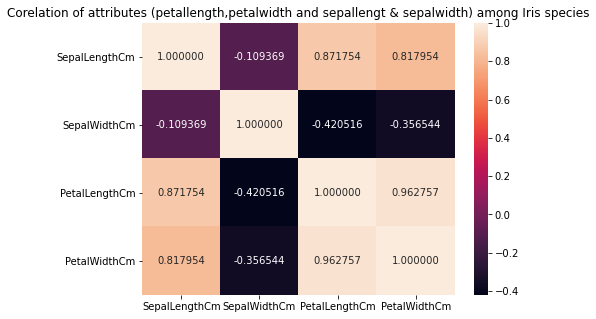

In [12]:
plt.subplots(figsize = (7,5))
sns.heatmap(df1.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petallength,petalwidth and sepallengt & sepalwidth) among Iris species")
plt.show()

#### As per the heatmap, it is observed that the Petal lenght and width are highly correlated.

### Data Visualization

### 1. Pair plot

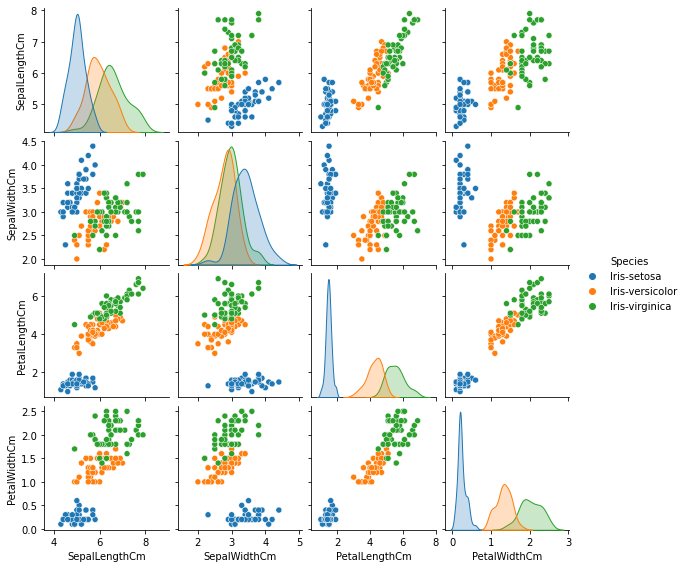

In [13]:
sns.pairplot(df1, hue='Species', palette=None, size=2)
plt.show()

#### In the Pair plots between different attributes, the Setosa is seperate whereas the Versiclor and Vriginica plots are together. 

### 2.1 Scatter plot of sepal length and sepal width

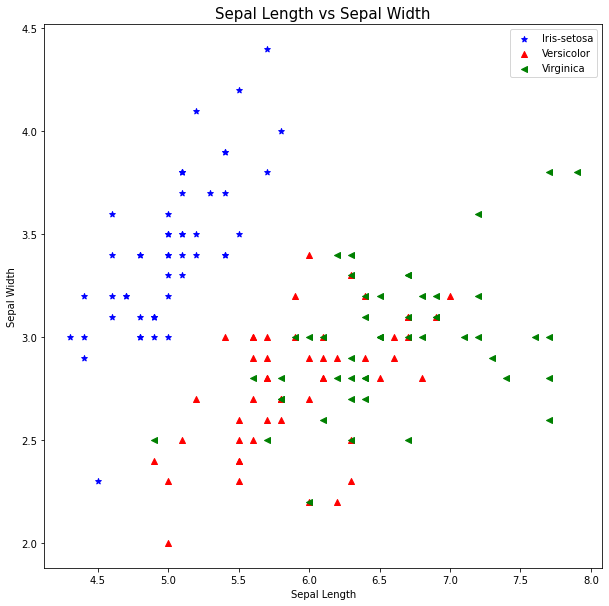

In [14]:
setosa = df1[df1['Species'] == "Iris-setosa"]
versicolor = df1[df1['Species'] == "Iris-versicolor"]
virginica = df1[df1['Species'] == "Iris-virginica"]


plt.figure(figsize=(10, 10))
plt.scatter(setosa['SepalLengthCm'],setosa['SepalWidthCm'], c="blue", label="Iris-setosa", marker = '*')
plt.scatter(versicolor['SepalLengthCm'],versicolor['SepalWidthCm'], c="red", label="Versicolor", marker = '^')
plt.scatter(virginica['SepalLengthCm'],virginica['SepalWidthCm'], c="green", label="Virginica", marker = '<')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width", fontsize=15)
plt.legend()
plt.show()

### 2.2 Scatter plot of petal length and petal width

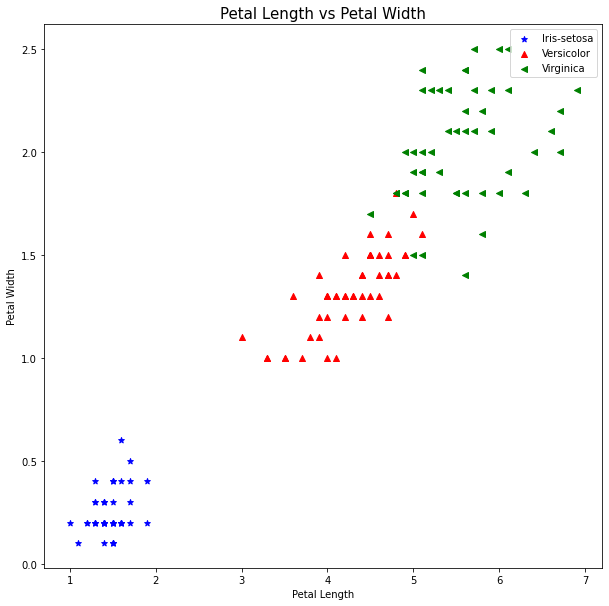

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(setosa['PetalLengthCm'],setosa['PetalWidthCm'], c="blue", label="Iris-setosa", marker = '*')
plt.scatter(versicolor['PetalLengthCm'],versicolor['PetalWidthCm'], c="red", label="Versicolor", marker = '^')
plt.scatter(virginica['PetalLengthCm'],virginica['PetalWidthCm'], c="green", label="Virginica", marker = '<')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Petal Width", fontsize=15)
plt.legend()
plt.show()

### 3. Data comparision using Barplot/Subplot

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

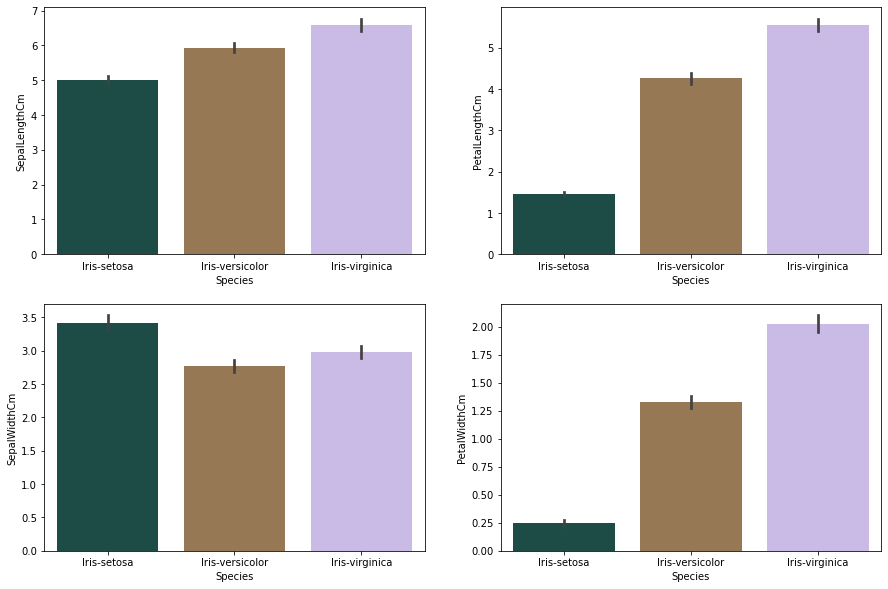

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLengthCm', data = df1, palette="cubehelix")
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'PetalLengthCm', data = df1, palette="cubehelix")
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'SepalWidthCm', data = df1, palette="cubehelix")
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidthCm', data = df1, palette="cubehelix")

# Test and Train data

In [17]:
x = df1.drop(columns="Species")
y = df1["Species"]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 1)

In [19]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
11,4.8,3.4,1.6,0.2
113,5.7,2.5,5.0,2.0
123,6.3,2.7,4.9,1.8
12,4.8,3.0,1.4,0.1
2,4.7,3.2,1.3,0.2


In [20]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [21]:
y_train.head()

11        Iris-setosa
113    Iris-virginica
123    Iris-virginica
12        Iris-setosa
2         Iris-setosa
Name: Species, dtype: object

In [22]:
y_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: Species, dtype: object

In [23]:
print("x_train=", len(x_train))
print("x_test=", len(x_test))
print("y_train=", len(y_train))
print("y_test=", len(y_test))

x_train= 90
x_test= 60
y_train= 90
y_test= 60


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Building models

### 1. Logistic Regression

In [25]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
predict = model.predict(x_test)
print('Predicted Values on Test Data',predict)

Predicted Values on Test Data ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-

In [27]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [28]:
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  0.9777777777777777
Test Accuracy:  0.9666666666666667


### 2. KNeighborsClassifier

In [29]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [30]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy of Model:\n",knn.score(x_train,y_train)*100)

Classification Report is:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.95      1.00      0.98        20

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 20]]
Accuracy of Model:
 96.66666666666667


### 3. Random Forest Classifier

In [31]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
accuracy_score(y_test,y_pred)

Classification Report is:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.95      0.95      0.95        21
 Iris-virginica       0.95      0.95      0.95        20

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60

Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  1 19]]
Training Score:
 100.0


0.9666666666666667

#### Conclusion:- I got the same accuracy of 0.966 using all the 3 models.

Thank you!